In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [64]:
df = pd.read_csv("train.csv")

In [65]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [67]:
df.set_index('id', inplace = True)
df.index.name = None

In [68]:
df.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


- Customers are in the age range of 20 - 85 years
- There are customers who have a driving license and some are not
- Premium payments for health insurance range from 2630 - 540165
- The length of time the customer uses insurance services at the company is in the range of 10 days - 299 days
- Customer answers regarding interest in participating in vehicle insurance (Response) are Interested (1) and not interested (0)

In [70]:
df.describe(include = "O").T

,count,unique,top,freq
Gender,381109,2,Male,206089
Vehicle_Age,381109,3,1-2 Year,200316
Vehicle_Damage,381109,2,Yes,192413


- Customers are more dominated by Male
- Most customers have owned a vehicle for 1 - 2 years
- Most customers have experienced damage to their vehicle

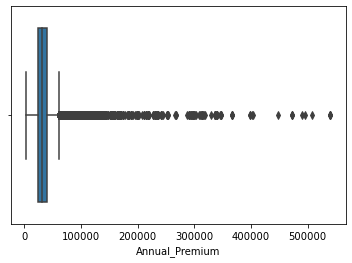

In [71]:
sns.boxplot(df['Annual_Premium'])
plt.show()

In [72]:
age = [17, 25, 45, 65, df['Age'].max()]
label = ['Milenial', 'Adult', 'Elderly 1', 'Eldery 2']

df['Age_group'] = pd.cut(df['Age'], bins = age, labels = label)

In [73]:
value_bin = [0, 30000, 250000, df['Annual_Premium'].max()]
label_bin = ['0 - 50000','50000 - 150000', 'more than 150000']

df['Premi_group'] = pd.cut(df['Annual_Premium'], bins = value_bin, labels = label_bin)

In [74]:
value_bin = [0, 100, 200, df['Vintage'].max()]
label_bin = ['0 - 100 months','100 - 200 months', 'more than 200 months']

df['Vintage_group'] = pd.cut(df['Vintage'], bins = value_bin, labels = label_bin)

In [75]:
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

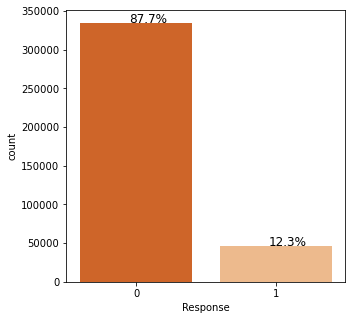

In [76]:
plt.figure(figsize = (5, 5))
ax = sns.countplot(df['Response'], palette = 'Oranges_r')
without_hue(ax, df['Response'])

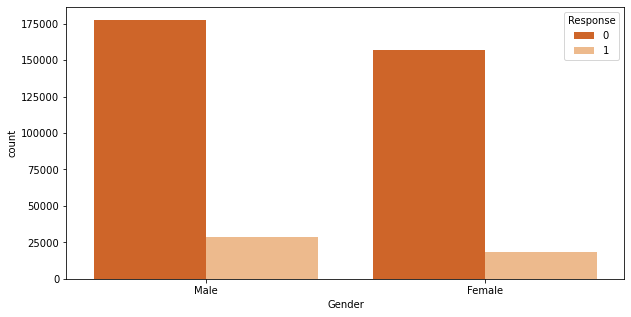

In [77]:
plt.figure(figsize=(10,5))
fig = sns.countplot(x = df['Gender'], hue = df['Response'], palette = 'Oranges_r')
plt.show(fig)

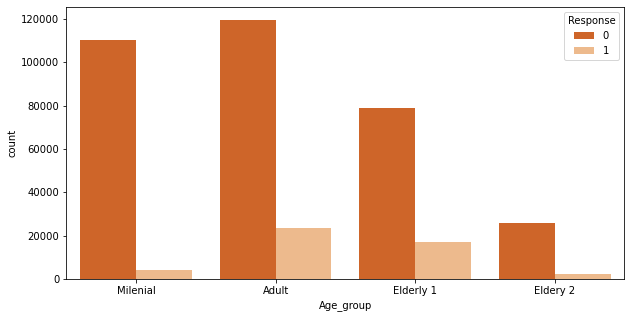

In [78]:
plt.figure(figsize=(10,5))
fig = sns.countplot(x = df['Age_group'], hue = df['Response'], palette = 'Oranges_r')
plt.show(fig)

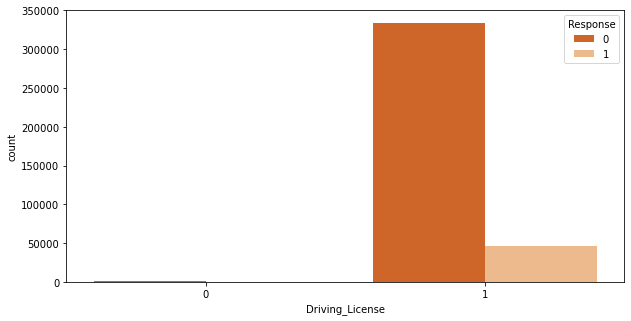

In [79]:
plt.figure(figsize=(10,5))
fig = sns.countplot(x = df['Driving_License'], hue = df['Response'], palette = 'Oranges_r')
plt.show(fig)

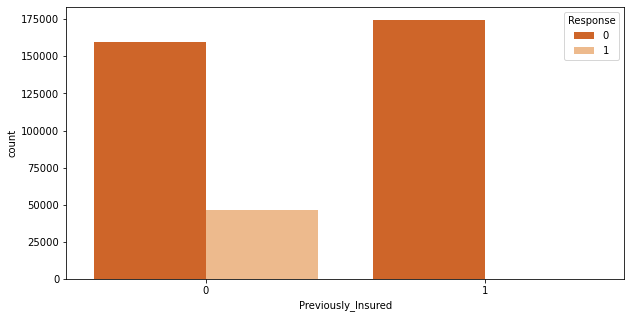

In [80]:
plt.figure(figsize=(10,5))
fig = sns.countplot(x = df['Previously_Insured'], hue = df['Response'], palette = 'Oranges_r')
plt.show(fig)

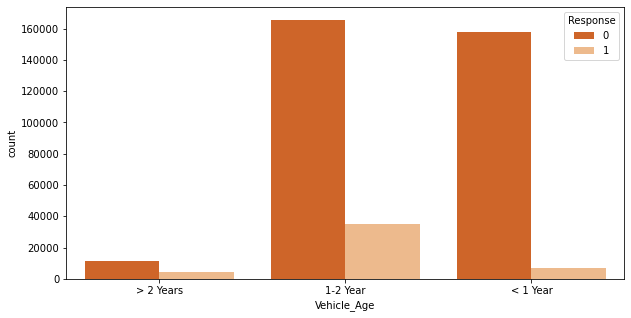

In [81]:
plt.figure(figsize=(10,5))
fig = sns.countplot(x = df['Vehicle_Age'], hue = df['Response'], palette = 'Oranges_r')
plt.show(fig)

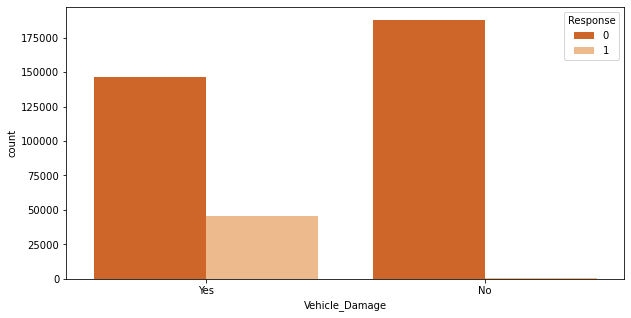

In [82]:
plt.figure(figsize=(10,5))
fig = sns.countplot(x = df['Vehicle_Damage'], hue = df['Response'], palette = 'Oranges_r')
plt.show(fig)

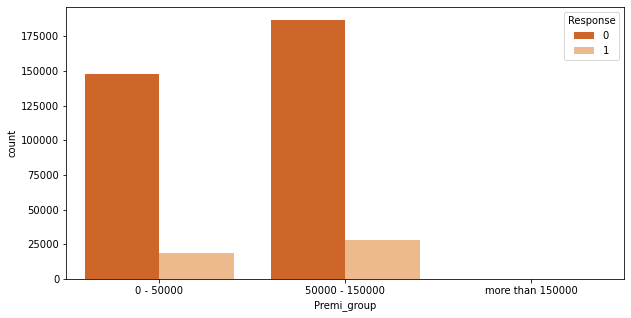

In [83]:
plt.figure(figsize=(10,5))
fig = sns.countplot(x = df['Premi_group'], hue = df['Response'], palette = 'Oranges_r')
plt.show(fig)

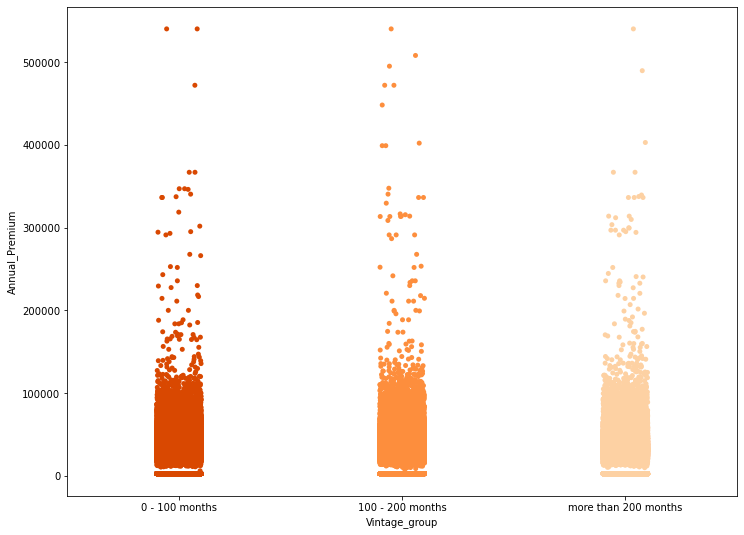

In [84]:
plt.figure(figsize=(12,9))
sns.stripplot(x = 'Vintage_group', y = 'Annual_Premium', data = df, palette='Oranges_r', dodge=True)
plt.show()

In [93]:
((pd.crosstab(index = df['Vintage_group'], columns = df['Response'], normalize = 'columns')*100)).round(2)

Response,0,1
Vintage_group,,
0 - 100 months,31.44,31.43
100 - 200 months,34.52,34.55
more than 200 months,34.04,34.02


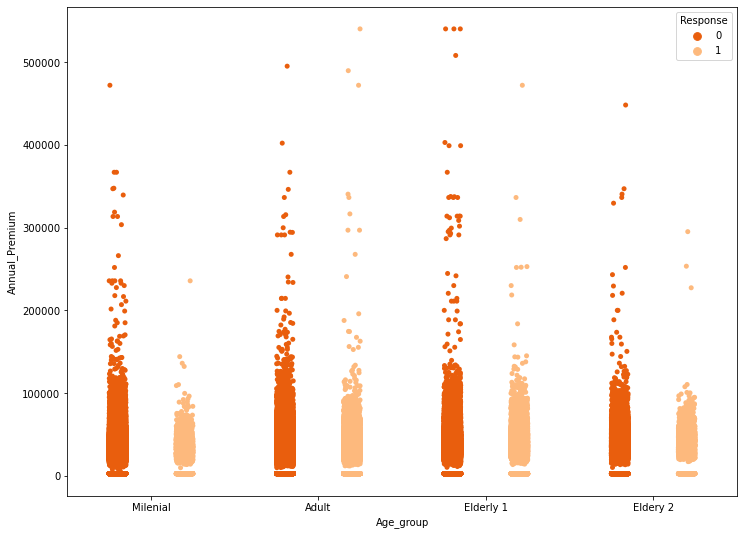

In [86]:
plt.figure(figsize=(12,9))
sns.stripplot(x = 'Age_group', y = 'Annual_Premium', data = df, hue='Response', palette='Oranges_r', dodge=True)
plt.show()